**Transformer の元祖論文（Attention is All You Need）で採用された位置情報付与方式**です。

目的は、**トークンに「順序情報」を数学的に与えること**です。

## 仕組み？

各トークンの埋め込みベクトルに**位置依存の sin/cos 波を足し込んで**位置による差を与えます。

### 直感的理解

* 位置 1 → 特定の波の値
* 位置 2 → その波が少し進んだ値
* 位置 50 → 周期が進んだ値

つまり、 **波の位相で位置を表す** 。

In [ ]:
import torch
import math

def positional_encoding(max_len, d_model):
    pe = torch.zeros(max_len, d_model)

    position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

    pe[:, 0::2] = torch.sin(position * div_term)  # 偶数次元にsin
    pe[:, 1::2] = torch.cos(position * div_term)  # 奇数次元にcos

    return pe

# 例: 最大50単語、埋め込み次元512
pe = positional_encoding(50, 512)
print(pe.shape)  # torch.Size([50, 512])


torch.Size([50, 512])


ランダムな入力に対して、peをそのまま要素和を行うことで、埋め込み表現と位置情報の線形和となる。

In [ ]:
x_original = torch.randn(1, 50, 512)  # (batch, seq_len, d_model)
pe = positional_encoding(50, 512)

x = x_original + pe[:x_original.size(1)]

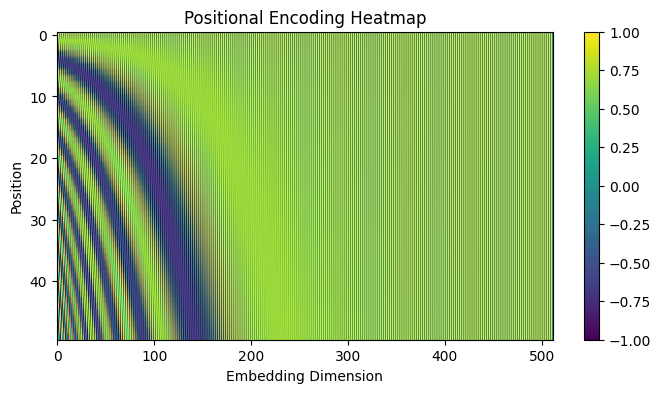

In [ ]:
# PEの可視化
import numpy as np
import matplotlib.pyplot as plt


# ---- Heatmap Visualization ----
plt.figure(figsize=(8, 4))
plt.imshow(pe, aspect='auto')
plt.title("Positional Encoding Heatmap")
plt.xlabel("Embedding Dimension")
plt.ylabel("Position")
plt.colorbar()
plt.show()
